In [28]:
import pickle
import numpy as np

# Chemin vers le fichier .pkl
file_path = "markov_chain_matrices.pkl"
#file_path = "markov_chain_matrices_llm.pkl"

# Charger les données
with open(file_path, 'rb') as file:
    matrix_values_history = pickle.load(file)

# Afficher les données pour vérifier
print(matrix_values_history)

print(matrix_values_history[-1])

matrix_values_history = [
    np.nan_to_num(matrix, nan=0).tolist() for matrix in matrix_values_history
]
print(matrix_values_history)
matrix_values_history.insert(0,[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])
print(matrix_values_history)

[[[nan, nan, nan], [1.0, 0.0, 0.0], [nan, nan, nan]], [[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [nan, nan, nan]], [[0.5, 0.0, 0.5], [1.0, 0.0, 0.0], [nan, nan, nan]], [[0.5, 0.0, 0.5], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0]], [[0.5, 0.0, 0.5], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0]], [[0.5, 0.0, 0.5], [1.0, 0.0, 0.0], [0.0, 0.3333333333333333, 0.6666666666666666]], [[0.5, 0.0, 0.5], [1.0, 0.0, 0.0], [0.0, 0.3333333333333333, 0.6666666666666666]], [[0.6666666666666666, 0.0, 0.3333333333333333], [1.0, 0.0, 0.0], [0.0, 0.3333333333333333, 0.6666666666666666]], [[0.5, 0.25, 0.25], [1.0, 0.0, 0.0], [0.0, 0.3333333333333333, 0.6666666666666666]], [[0.5, 0.25, 0.25], [0.6666666666666666, 0.0, 0.3333333333333333], [0.0, 0.3333333333333333, 0.6666666666666666]], [[0.5, 0.25, 0.25], [0.6666666666666666, 0.0, 0.3333333333333333], [0.0, 0.25, 0.75]], [[0.5, 0.25, 0.25], [0.6666666666666666, 0.0, 0.3333333333333333], [0.2, 0.2, 0.6]], [[0.6, 0.2, 0.2], [0.6666666666666666, 0.0, 0.3333333333333333], [0.2, 0.2, 0.6]], 

In [7]:
print(len(matrix_values_history))

20


In [ ]:
probas_extracted = []
for idx, elem in enumerate("10022210012200002210"):
    probas_extracted.append(matrix_values_history[idx][int(elem)])

In [29]:
probas_extracted = [[0.0, 0.0, 0.0]]
for idx, elem in enumerate("10022210012200002210"):
    if idx != 19:
        probas_extracted.append(matrix_values_history[idx+1][int(elem)])
        print(idx)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [30]:
print(probas_extracted)

[[0.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.5, 0.0, 0.5], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.3333333333333333, 0.6666666666666666], [1.0, 0.0, 0.0], [0.6666666666666666, 0.0, 0.3333333333333333], [0.5, 0.25, 0.25], [0.6666666666666666, 0.0, 0.3333333333333333], [0.0, 0.25, 0.75], [0.2, 0.2, 0.6], [0.6, 0.2, 0.2], [0.6666666666666666, 0.16666666666666666, 0.16666666666666666], [0.7142857142857143, 0.14285714285714285, 0.14285714285714285], [0.625, 0.125, 0.25], [0.16666666666666666, 0.16666666666666666, 0.6666666666666666], [0.14285714285714285, 0.2857142857142857, 0.5714285714285714], [0.75, 0.0, 0.25]]


In [35]:
def format_number_with_zeros(number, k):
    return f"{number:0{k}d}"

In [38]:
import os

# Code TikZ de base
tikz_template = r"""
\documentclass{{standalone}}
\usepackage{{tikz}}

% Définir le nombre d'états
\def\N{{3}}
% Définir les couleurs basées sur la palette Cubhelix
\definecolor{{cubhelix0}}{{RGB}}{{218, 59, 70}}
\definecolor{{cubhelix1}}{{RGB}}{{58, 133, 75}}
\definecolor{{cubhelix2}}{{RGB}}{{63, 127, 147}}

% Définir un style personnalisé pour les étiquettes des flèches
\tikzset{{
    arrow label/.style={{
        font=\Large\sffamily,
        inner sep=3pt
    }}
}}

\begin{{document}}

\begin{{tikzpicture}}[->, auto, thick, node distance=4cm, >=latex] 

    \tikzstyle{{state0}} = [
        circle, 
        draw=cubhelix0, 
        line width=1.5pt, 
        text=cubhelix0, 
        minimum size=1cm, 
        font=\large\sffamily\bfseries
    ]
    \tikzstyle{{state1}} = [
        circle, 
        draw=cubhelix1, 
        line width=1.5pt, 
        text=cubhelix1, 
        minimum size=1cm, 
        font=\large\sffamily\bfseries
    ]
    \tikzstyle{{state2}} = [
        circle, 
        draw=cubhelix2, 
        line width=1.5pt, 
        text=cubhelix2, 
        minimum size=1cm, 
        font=\large\sffamily\bfseries
    ]

    % Créer les nœuds
    \node[state0] (0) at (0,0) {{0}};
    \node[state1] (1) at (2,3) {{1}};
    \node[state2] (2) at (4,0) {{2}};

    % Dessiner les arêtes avec des flèches améliorées
    \path[->, very thick, >=latex, draw=black] 
        (0) edge [loop left, distance=1cm, out=200, in=225] node[arrow label, left] {{{val00}}} (0)
            edge [bend left=20] node[arrow label, left] {{{val01}}} (1)
            edge [bend left=15] node[arrow label, above] {{{val02}}} (2)
        (1) edge [loop above, distance=1cm, out=75, in=100] node[arrow label, above] {{{val11}}} (1)
            edge [bend left=20] node[arrow label, left] {{{val10}}} (0)
            edge [bend left=20] node[arrow label, right] {{{val12}}} (2)
        (2) edge [loop right, distance=1cm, out=-50, in=-25] node[arrow label, right] {{{val22}}} (2)
            edge [bend left=15] node[arrow label, below] {{{val20}}} (0)
            edge [bend left=20] node[arrow label, right] {{{val21}}} (1);

\end{{tikzpicture}}

\end{{document}}
"""

# Créer un dossier pour stocker les fichiers
output_dir = "tikz_figures_freq2"
os.makedirs(output_dir, exist_ok=True)

def format_number_with_zeros(number, k):
    return f"{number:0{k}d}"

# Exemple d'utilisation
print(format_number_with_zeros(3, 2))  # Affiche '03'
print(format_number_with_zeros(123, 5))  # Affiche '00123'


# Générer les fichiers .tex
for i, matrix in enumerate(matrix_values_history):
    tikz_code = tikz_template.format(
        val00=f"{matrix[0][0]:.2f}", val01=f"{matrix[0][1]:.2f}", val02=f"{matrix[0][2]:.2f}",
        val10=f"{matrix[1][0]:.2f}", val11=f"{matrix[1][1]:.2f}", val12=f"{matrix[1][2]:.2f}",
        val20=f"{matrix[2][0]:.2f}", val21=f"{matrix[2][1]:.2f}", val22=f"{matrix[2][2]:.2f}"
    )
    file_path = os.path.join(output_dir, f"matrix_{format_number_with_zeros(i+1,2)}.tex")
    with open(file_path, "w") as f:
        f.write(tikz_code)

print(f"Les fichiers TikZ ont été générés dans le dossier '{output_dir}'.")

03
00123
Les fichiers TikZ ont été générés dans le dossier 'tikz_figures_freq2'.


In [1]:
template = r"""
\documentclass{standalone}
\usepackage{tikz}
\usepackage{xcolor} % Pour la gestion des couleurs

% Définir les couleurs basées sur la palette Cubhelix
\definecolor{cubhelix0}{RGB}{218, 59, 70}
\definecolor{cubhelix1}{RGB}{58, 133, 75}
\definecolor{cubhelix2}{RGB}{63, 127, 147}

\begin{document}

\begin{tikzpicture}[node distance=4cm, >=latex, auto, thick]

    % Ajouter la séquence colorée
    \node[below=2cm of 0] {%
        \large\sffamily\bfseries
        \textcolor{cubhelix1}{1}%
        \textcolor{cubhelix0}{0}%
        \textcolor{cubhelix0}{0}%
        \textcolor{cubhelix2}{2}%
        \textcolor{cubhelix2}{2}%
        \textcolor{cubhelix2}{2}%
        \textcolor{cubhelix1}{1}%
        \textcolor{cubhelix0}{0}%
        \textcolor{cubhelix0}{0}%
        \textcolor{cubhelix1}{1}%
        \textcolor{cubhelix2}{2}%
        \textcolor{cubhelix2}{2}%
        \textcolor{cubhelix0}{0}%
        \textcolor{cubhelix0}{0}%
        \textcolor{cubhelix0}{0}%
        \textcolor{cubhelix0}{0}%
        \textcolor{cubhelix2}{2}%
        \textcolor{cubhelix2}{2}%
        \textcolor{cubhelix1}{{\phantom{X}}}%
        \textcolor{cubhelix0}{0}%
    };

\end{tikzpicture}

\end{document}
"""

output_directory = "samples_figures_freq"  # Specify the directory where files will be saved

import os

os.makedirs(output_directory, exist_ok=True)

for i in range(20):
    # Replace the `\phantom{X}` with the current number
    content = template.replace(r"\phantom{X}", str(i))
    
    # Write to a new file
    file_path = os.path.join(output_directory, f"file_{i}.tex")
    with open(file_path, "w", encoding="utf-8") as f:
        f.write(content)

print(f"20 LaTeX files have been generated in {output_directory}.")


20 LaTeX files have been generated in samples_figures_freq.


In [2]:
template_start = r"""
\documentclass{standalone}
\usepackage{tikz}
\usepackage{xcolor} % Pour la gestion des couleurs

% Définir les couleurs basées sur la palette Cubhelix
\definecolor{cubhelix0}{RGB}{218, 59, 70}
\definecolor{cubhelix1}{RGB}{58, 133, 75}
\definecolor{cubhelix2}{RGB}{63, 127, 147}

\begin{document}

\begin{tikzpicture}[node distance=4cm, >=latex, auto, thick]

    % Ajouter la séquence colorée
    \node[below=2cm of 0] {%
        \large\sffamily\bfseries
"""

template_end = r"""
    };

\end{tikzpicture}

\end{document}
"""

# Séquence de caractères
sequence = [
    r"\textcolor{cubhelix1}{1}",
    r"\textcolor{cubhelix0}{0}",
    r"\textcolor{cubhelix0}{0}",
    r"\textcolor{cubhelix2}{2}",
    r"\textcolor{cubhelix2}{2}",
    r"\textcolor{cubhelix2}{2}",
    r"\textcolor{cubhelix1}{1}",
    r"\textcolor{cubhelix0}{0}",
    r"\textcolor{cubhelix0}{0}",
    r"\textcolor{cubhelix1}{1}",
    r"\textcolor{cubhelix2}{2}",
    r"\textcolor{cubhelix2}{2}",
    r"\textcolor{cubhelix0}{0}",
    r"\textcolor{cubhelix0}{0}",
    r"\textcolor{cubhelix0}{0}",
    r"\textcolor{cubhelix0}{0}",
    r"\textcolor{cubhelix2}{2}",
    r"\textcolor{cubhelix2}{2}",
    r"\textcolor{cubhelix1}{1}",
    r"\textcolor{cubhelix0}{0}"
]

import os

# Créer un répertoire pour les fichiers générés
output_directory = "samples_figures_freq"
os.makedirs(output_directory, exist_ok=True)

# Générer les fichiers
for i in range(20):
    content = ""
    for j in range(len(sequence)):
        if j <= i:
            content += sequence[j]
        else:
            content += r"\phantom{" + sequence[j] + "}"
    tex_content = template_start + content + template_end
    file_path = os.path.join(output_directory, f"file_{i}.tex")
    with open(file_path, "w", encoding="utf-8") as f:
        f.write(tex_content)

print(f"20 LaTeX files have been generated in {output_directory}.")


20 LaTeX files have been generated in samples_figures_freq.


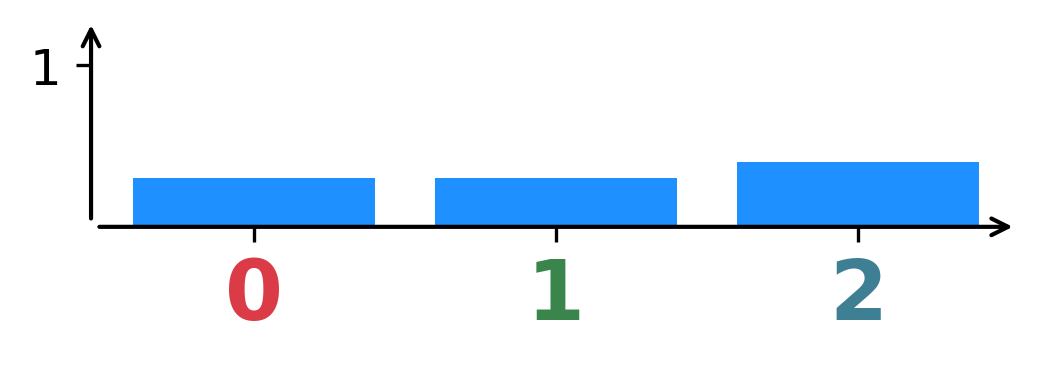

In [31]:
import matplotlib.pyplot as plt

n=3
true_dist = [0.3,0.3,0.4]
fig, axs = plt.subplots(1, 1, figsize=(4, 0.7), dpi=300)
plt.bar(range(n), true_dist, color='dodgerblue')
axs.annotate('', xy=(1, 0), xycoords='axes fraction', xytext=(0, 0), 
             arrowprops=dict(arrowstyle="->", color='k'))
axs.annotate('', xy=(0, 1.3), xycoords='axes fraction', xytext=(0, 0), 
             arrowprops=dict(arrowstyle="->", color='k'))

# Définir les ticks de l'axe des x
axs.set_xticks([0, 1, 2])  # Affiche uniquement 0, 1 et 2
axs.set_xticklabels(
    ['0', '1', '2'] # Taille des labels
)


# Personnaliser chaque tick
ticks = axs.get_xticklabels()
ticks[0].set_color('#DA3B46')   # Couleur rouge pour 0
ticks[1].set_color('#3A854B') # Couleur verte pour 1
ticks[2].set_color('#3F7F93')  # Couleur bleue pour 2

# Mettre les ticks en gras
for tick in ticks:
    tick.set_fontweight('bold')

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.set_ylim(0, 1)  # Fixer l'axe y de 0 à 1 (pour les données)
axs.set_yticks([1])  # Supprimer les ticks de l'axe y

# Ajuster la taille des ticks sur les axes
axs.tick_params(axis='x', labelsize=20)  # Taille des ticks de l'axe X
axs.tick_params(axis='y', labelsize=12)  # Taille des ticks de l'axe Y (si nécessaire)

In [37]:
import os
# Définir le nombre d'états
n = 3

# Créer le dossier de sauvegarde
output_dir = "probas_outputed_freq"
os.makedirs(output_dir, exist_ok=True)

# Générer les figures
for i, true_dist in enumerate(probas_extracted):
    # Créer une nouvelle figure
    fig, axs = plt.subplots(1, 1, figsize=(4, 0.7), dpi=300)
    
    # Tracer le graphique à barres
    axs.bar(range(n), true_dist, color='dodgerblue')
    
    # Ajouter les flèches pour les axes
    axs.annotate('', xy=(1, 0), xycoords='axes fraction', xytext=(0, 0), 
                 arrowprops=dict(arrowstyle="->", color='k'))
    axs.annotate('', xy=(0, 1.3), xycoords='axes fraction', xytext=(0, 0), 
                 arrowprops=dict(arrowstyle="->", color='k'))
    
    # Définir les ticks de l'axe des x
    axs.set_xticks([0, 1, 2])  # Affiche uniquement 0, 1 et 2
    axs.set_xticklabels(
    ['0', '1', '2'] # Taille des labels
    )

    # Personnaliser chaque tick
    ticks = axs.get_xticklabels()
    ticks[0].set_color('#DA3B46')   # Couleur rouge pour 0
    ticks[1].set_color('#3A854B') # Couleur verte pour 1
    ticks[2].set_color('#3F7F93')  # Couleur bleue pour 2

    # Mettre les ticks en gras
    for tick in ticks:
        tick.set_fontweight('bold')
    
    # Cacher les spines inutiles et ajuster les limites
    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)
    axs.spines['left'].set_visible(False)
    axs.spines['bottom'].set_visible(False)
    axs.set_ylim(0, 1)  # Fixer l'axe y de 0 à 1 (pour les données)
    axs.set_yticks([1])  # Supprimer les ticks de l'axe y
    
    axs.tick_params(axis='x', labelsize=20)  # Taille des ticks de l'axe X
    axs.tick_params(axis='y', labelsize=12)  # Taille des ticks de l'axe Y (si nécessaire)
    
    # Sauvegarder la figure en PDF
    filename = os.path.join(output_dir, f"figure_{format_number_with_zeros(i + 1,2)}.pdf")
    plt.savefig(filename, format="pdf", bbox_inches="tight")
    
    # Fermer la figure pour libérer la mémoire
    plt.close(fig)

print(f"Toutes les figures ont été sauvegardées dans le dossier '{output_dir}'")

Toutes les figures ont été sauvegardées dans le dossier 'probas_outputed_freq'
